In [201]:
#import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [202]:
#load the dataset
df = pd.read_csv('flight_price.csv')

In [203]:
df

,Unnamed: 0,airline_name,date_of_journey,source,destination,departure_time,arrival_time,duration,total_stops,price
0,0,IndiGo,"Mon, 15 Nov",New Delhi,Chennai,20:30,23:20,2h 50m,2 Stops,"2,341"
1,1,SpiceJet,"Mon, 15 Nov",New Delhi,Chennai,18:25,21:10,2h 45m,1 Stop,"2,621"
2,2,SpiceJet,"Mon, 15 Nov",New Delhi,Chennai,06:15,09:10,2h 55m,1 Stop,"2,621"
3,3,Air India,"Mon, 15 Nov",New Delhi,Chennai,20:40,23:35,2h 55m,1 Stop,"2,658"
4,4,Vistara,"Mon, 15 Nov",New Delhi,Chennai,13:30,16:20,2h 50m,1 Stop,"2,715"
...,...,...,...,...,...,...,...,...,...,...
1665,1665,Air India,"Fri, 19 Nov",Pune,Lucknow,18:50,08:15\n+ 1 day,13h 25m,1 Stop,"5,255"
1666,1666,Air India,"Fri, 19 Nov",Pune,Lucknow,08:45,08:15\n+ 1 day,23h 30m,1 Stop,"5,255"
1667,1667,Air India,"Fri, 19 Nov",Pune,Lucknow,18:50,19:40\n+ 1 day,24h 50m,1 Stop,"5,255"
1668,1668,Go First,"Fri, 19 Nov",Pune,Lucknow,15:30,22:15,6h 45m,1 Stop,"5,358"


In [204]:
#checking for null values
df.isnull().sum()

Unnamed: 0           0
airline_name         0
date_of_journey      0
source               0
destination          0
departure_time       0
arrival_time         0
duration             0
total_stops        441
price                0
dtype: int64

In [205]:
#drop null columns
df.dropna(inplace=True)
df.isnull().sum()

Unnamed: 0         0
airline_name       0
date_of_journey    0
source             0
destination        0
departure_time     0
arrival_time       0
duration           0
total_stops        0
price              0
dtype: int64

In [206]:
df['duration'] = df['duration'].replace(['--'],'0')

In [207]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [208]:
print (df.dtypes)

airline_name       object
date_of_journey    object
source             object
destination        object
departure_time     object
arrival_time       object
duration           object
total_stops        object
price              object
dtype: object


In [209]:
df['price'] = df['price'].replace(',','', regex=True).astype(float)

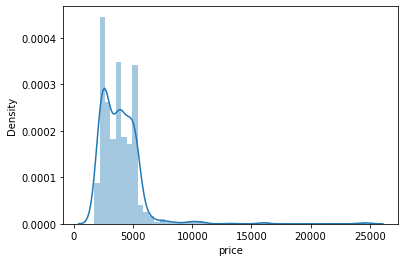

In [210]:
#The distribution of review sentiment polarity score
ax = sns.distplot(df['price'])

In [211]:
df

,airline_name,date_of_journey,source,destination,departure_time,arrival_time,duration,total_stops,price
0,IndiGo,"Mon, 15 Nov",New Delhi,Chennai,20:30,23:20,2h 50m,2 Stops,2341.0
1,SpiceJet,"Mon, 15 Nov",New Delhi,Chennai,18:25,21:10,2h 45m,1 Stop,2621.0
2,SpiceJet,"Mon, 15 Nov",New Delhi,Chennai,06:15,09:10,2h 55m,1 Stop,2621.0
3,Air India,"Mon, 15 Nov",New Delhi,Chennai,20:40,23:35,2h 55m,1 Stop,2658.0
4,Vistara,"Mon, 15 Nov",New Delhi,Chennai,13:30,16:20,2h 50m,1 Stop,2715.0
...,...,...,...,...,...,...,...,...,...
1665,Air India,"Fri, 19 Nov",Pune,Lucknow,18:50,08:15\n+ 1 day,13h 25m,1 Stop,5255.0
1666,Air India,"Fri, 19 Nov",Pune,Lucknow,08:45,08:15\n+ 1 day,23h 30m,1 Stop,5255.0
1667,Air India,"Fri, 19 Nov",Pune,Lucknow,18:50,19:40\n+ 1 day,24h 50m,1 Stop,5255.0
1668,Go First,"Fri, 19 Nov",Pune,Lucknow,15:30,22:15,6h 45m,1 Stop,5358.0


[Text(0.5, 0, 'Airline Name'), Text(0, 0.5, 'Count')]

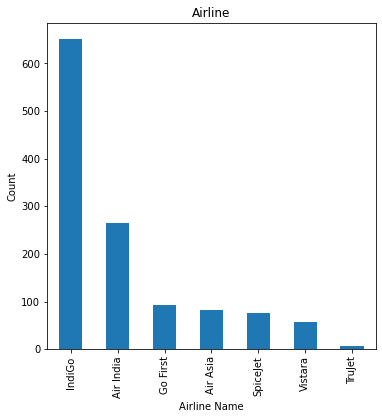

In [212]:
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
plt1 = df['airline_name'].value_counts().plot(kind='bar')
plt.title('Airline')
plt1.set(xlabel = 'Airline Name', ylabel='Count')

Text(0.5, 0, 'Airline')

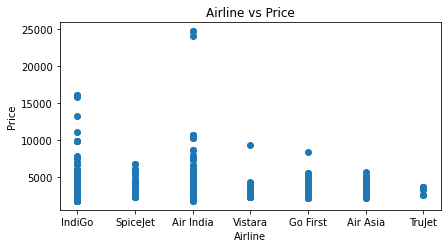

In [213]:
plt.figure(figsize=(15,20))
plt.subplot(5,2,1)
plt.scatter(df['airline_name'],df['price'])
plt.title('Airline vs Price')
plt.ylabel('Price')
plt.xlabel('Airline')

Text(0.5, 0, 'Date')

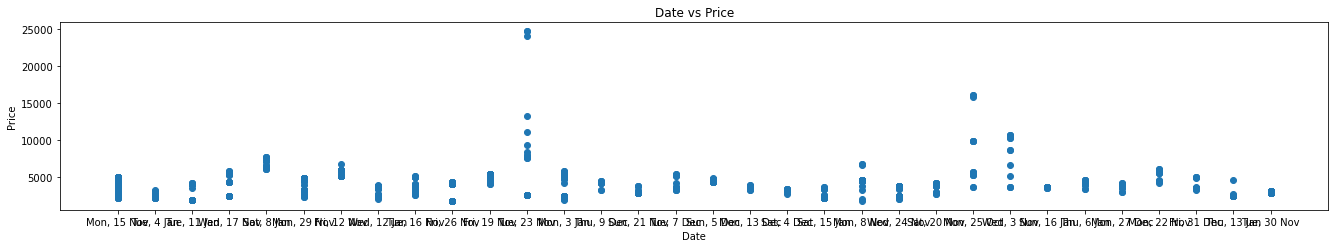

In [214]:
plt.figure(figsize=(50,20))
plt.subplot(5,2,1)
plt.scatter(df['date_of_journey'],df['price'])
plt.title('Date vs Price')
plt.ylabel('Price')
plt.xlabel('Date')

In [215]:
category = ['airline_name','source','destination','total_stops']

In [216]:
for i in category:
    print(i,df[i].unique())

airline_name ['IndiGo' 'SpiceJet' 'Air India' 'Vistara' 'Go First' 'Air Asia' 'TruJet']
source ['New Delhi' 'Mumbai' 'Bangalore' 'Hyderabad' 'Kolkata' 'Pune' 'Chennai'
 'Patna']
destination ['Chennai' 'Hyderabad' 'Goa' 'Bangalore' 'Mumbai' 'Port Blair' 'Imphal'
 'Vijayawada' 'Jammu' 'Trivandrum' 'Varanasi' 'Chandigarh' 'Dehradun'
 'Coimbatore' 'Kolkata' 'Kochi' 'Indore' 'Mangalore' 'New Delhi' 'Jaipur'
 'Lucknow' 'Guwahati' 'Surat' 'Nagpur' 'Tirupati' 'Ahmedabad'
 'Rajahmundry' 'Aurangabad' 'Pune' 'Srinagar']
total_stops ['2 Stops' '1 Stop' '3 Stops' '2 Stop(s)' '3 Stop(s)']


In [217]:
splitted = df.date_of_journey.str.split(" ")

In [218]:
df['month'] = splitted.str[2]

In [219]:
df

,airline_name,date_of_journey,source,destination,departure_time,arrival_time,duration,total_stops,price,month
0,IndiGo,"Mon, 15 Nov",New Delhi,Chennai,20:30,23:20,2h 50m,2 Stops,2341.0,Nov
1,SpiceJet,"Mon, 15 Nov",New Delhi,Chennai,18:25,21:10,2h 45m,1 Stop,2621.0,Nov
2,SpiceJet,"Mon, 15 Nov",New Delhi,Chennai,06:15,09:10,2h 55m,1 Stop,2621.0,Nov
3,Air India,"Mon, 15 Nov",New Delhi,Chennai,20:40,23:35,2h 55m,1 Stop,2658.0,Nov
4,Vistara,"Mon, 15 Nov",New Delhi,Chennai,13:30,16:20,2h 50m,1 Stop,2715.0,Nov
...,...,...,...,...,...,...,...,...,...,...
1665,Air India,"Fri, 19 Nov",Pune,Lucknow,18:50,08:15\n+ 1 day,13h 25m,1 Stop,5255.0,Nov
1666,Air India,"Fri, 19 Nov",Pune,Lucknow,08:45,08:15\n+ 1 day,23h 30m,1 Stop,5255.0,Nov
1667,Air India,"Fri, 19 Nov",Pune,Lucknow,18:50,19:40\n+ 1 day,24h 50m,1 Stop,5255.0,Nov
1668,Go First,"Fri, 19 Nov",Pune,Lucknow,15:30,22:15,6h 45m,1 Stop,5358.0,Nov


In [220]:
df['total_stops'] = df['total_stops'].str.split(" ")
df['total_stops'] = df['total_stops'].str[0]

In [221]:
df['hours'] = df['duration'].str.split(" ")
df['hours'] = df['hours'].str[0]


In [222]:
df['hours'] = df['hours'].str.split("h")
df['hours'] = df['hours'].str[0]

In [223]:
df['mins'] = df['duration'].str.split(" ")
df['mins'] = df['mins'].str[1]
df['mins'] = df['mins'].str.split("m")
df['mins'] = df['mins'].str[0]

In [224]:
df['arrival_time'] = df['arrival_time'].str.split(":")
df['arrival_time_hour'] = df['arrival_time'].str[0]
df['arrival_time_min'] = df['arrival_time'].str[1]


In [225]:
df['arrival_time_min'] = df['arrival_time_min'].str.split("\n")

In [226]:
df['arrival_time_min'] = df['arrival_time_min'].str[0]

In [227]:
df['hours'] = df['total_stops'].astype('int64')
df['mins'] = df['total_stops'].astype('int64')
df['total_stops'] = df['total_stops'].astype('int64')
df['arrival_time_hour'] = df['arrival_time_hour'].astype('int64')
df['arrival_time_min'] = df['arrival_time_min'].astype('int64')

In [228]:
df

,airline_name,date_of_journey,source,destination,departure_time,arrival_time,duration,total_stops,price,month,hours,mins,arrival_time_hour,arrival_time_min
0,IndiGo,"Mon, 15 Nov",New Delhi,Chennai,20:30,"[23, 20]",2h 50m,2,2341.0,Nov,2,2,23,20
1,SpiceJet,"Mon, 15 Nov",New Delhi,Chennai,18:25,"[21, 10]",2h 45m,1,2621.0,Nov,1,1,21,10
2,SpiceJet,"Mon, 15 Nov",New Delhi,Chennai,06:15,"[09, 10]",2h 55m,1,2621.0,Nov,1,1,9,10
3,Air India,"Mon, 15 Nov",New Delhi,Chennai,20:40,"[23, 35]",2h 55m,1,2658.0,Nov,1,1,23,35
4,Vistara,"Mon, 15 Nov",New Delhi,Chennai,13:30,"[16, 20]",2h 50m,1,2715.0,Nov,1,1,16,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,Air India,"Fri, 19 Nov",Pune,Lucknow,18:50,"[08, 15\n+ 1 day]",13h 25m,1,5255.0,Nov,1,1,8,15
1666,Air India,"Fri, 19 Nov",Pune,Lucknow,08:45,"[08, 15\n+ 1 day]",23h 30m,1,5255.0,Nov,1,1,8,15
1667,Air India,"Fri, 19 Nov",Pune,Lucknow,18:50,"[19, 40\n+ 1 day]",24h 50m,1,5255.0,Nov,1,1,19,40
1668,Go First,"Fri, 19 Nov",Pune,Lucknow,15:30,"[22, 15]",6h 45m,1,5358.0,Nov,1,1,22,15


In [229]:
import calendar
look_up = {'Jan':'01', 'Feb':'02' ,  'Mar':'03',  'Apr':'04', 'May':'05' ,
            'Jun':'06' ,  'Jul':'07',  'Aug':'08',  'Sep':'09',  'Oct':'10',  'Nov':'11','Dec': '12'}

df['month'] = df['month'].apply(lambda x: look_up[x])
df

,airline_name,date_of_journey,source,destination,departure_time,arrival_time,duration,total_stops,price,month,hours,mins,arrival_time_hour,arrival_time_min
0,IndiGo,"Mon, 15 Nov",New Delhi,Chennai,20:30,"[23, 20]",2h 50m,2,2341.0,11,2,2,23,20
1,SpiceJet,"Mon, 15 Nov",New Delhi,Chennai,18:25,"[21, 10]",2h 45m,1,2621.0,11,1,1,21,10
2,SpiceJet,"Mon, 15 Nov",New Delhi,Chennai,06:15,"[09, 10]",2h 55m,1,2621.0,11,1,1,9,10
3,Air India,"Mon, 15 Nov",New Delhi,Chennai,20:40,"[23, 35]",2h 55m,1,2658.0,11,1,1,23,35
4,Vistara,"Mon, 15 Nov",New Delhi,Chennai,13:30,"[16, 20]",2h 50m,1,2715.0,11,1,1,16,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,Air India,"Fri, 19 Nov",Pune,Lucknow,18:50,"[08, 15\n+ 1 day]",13h 25m,1,5255.0,11,1,1,8,15
1666,Air India,"Fri, 19 Nov",Pune,Lucknow,08:45,"[08, 15\n+ 1 day]",23h 30m,1,5255.0,11,1,1,8,15
1667,Air India,"Fri, 19 Nov",Pune,Lucknow,18:50,"[19, 40\n+ 1 day]",24h 50m,1,5255.0,11,1,1,19,40
1668,Go First,"Fri, 19 Nov",Pune,Lucknow,15:30,"[22, 15]",6h 45m,1,5358.0,11,1,1,22,15


In [230]:
df['month'] = df['month'].astype('int64')

In [231]:
df.drop(columns=['arrival_time'],inplace=True)

airline_name ['IndiGo' 'SpiceJet' 'Air India' 'Vistara' 'Go First' 'Air Asia' 'TruJet']
source ['New Delhi' 'Mumbai' 'Bangalore' 'Hyderabad' 'Kolkata' 'Pune' 'Chennai'
 'Patna']
destination ['Chennai' 'Hyderabad' 'Goa' 'Bangalore' 'Mumbai' 'Port Blair' 'Imphal'
 'Vijayawada' 'Jammu' 'Trivandrum' 'Varanasi' 'Chandigarh' 'Dehradun'
 'Coimbatore' 'Kolkata' 'Kochi' 'Indore' 'Mangalore' 'New Delhi' 'Jaipur'
 'Lucknow' 'Guwahati' 'Surat' 'Nagpur' 'Tirupati' 'Ahmedabad'
 'Rajahmundry' 'Aurangabad' 'Pune' 'Srinagar']
total_stops [2 1 3]


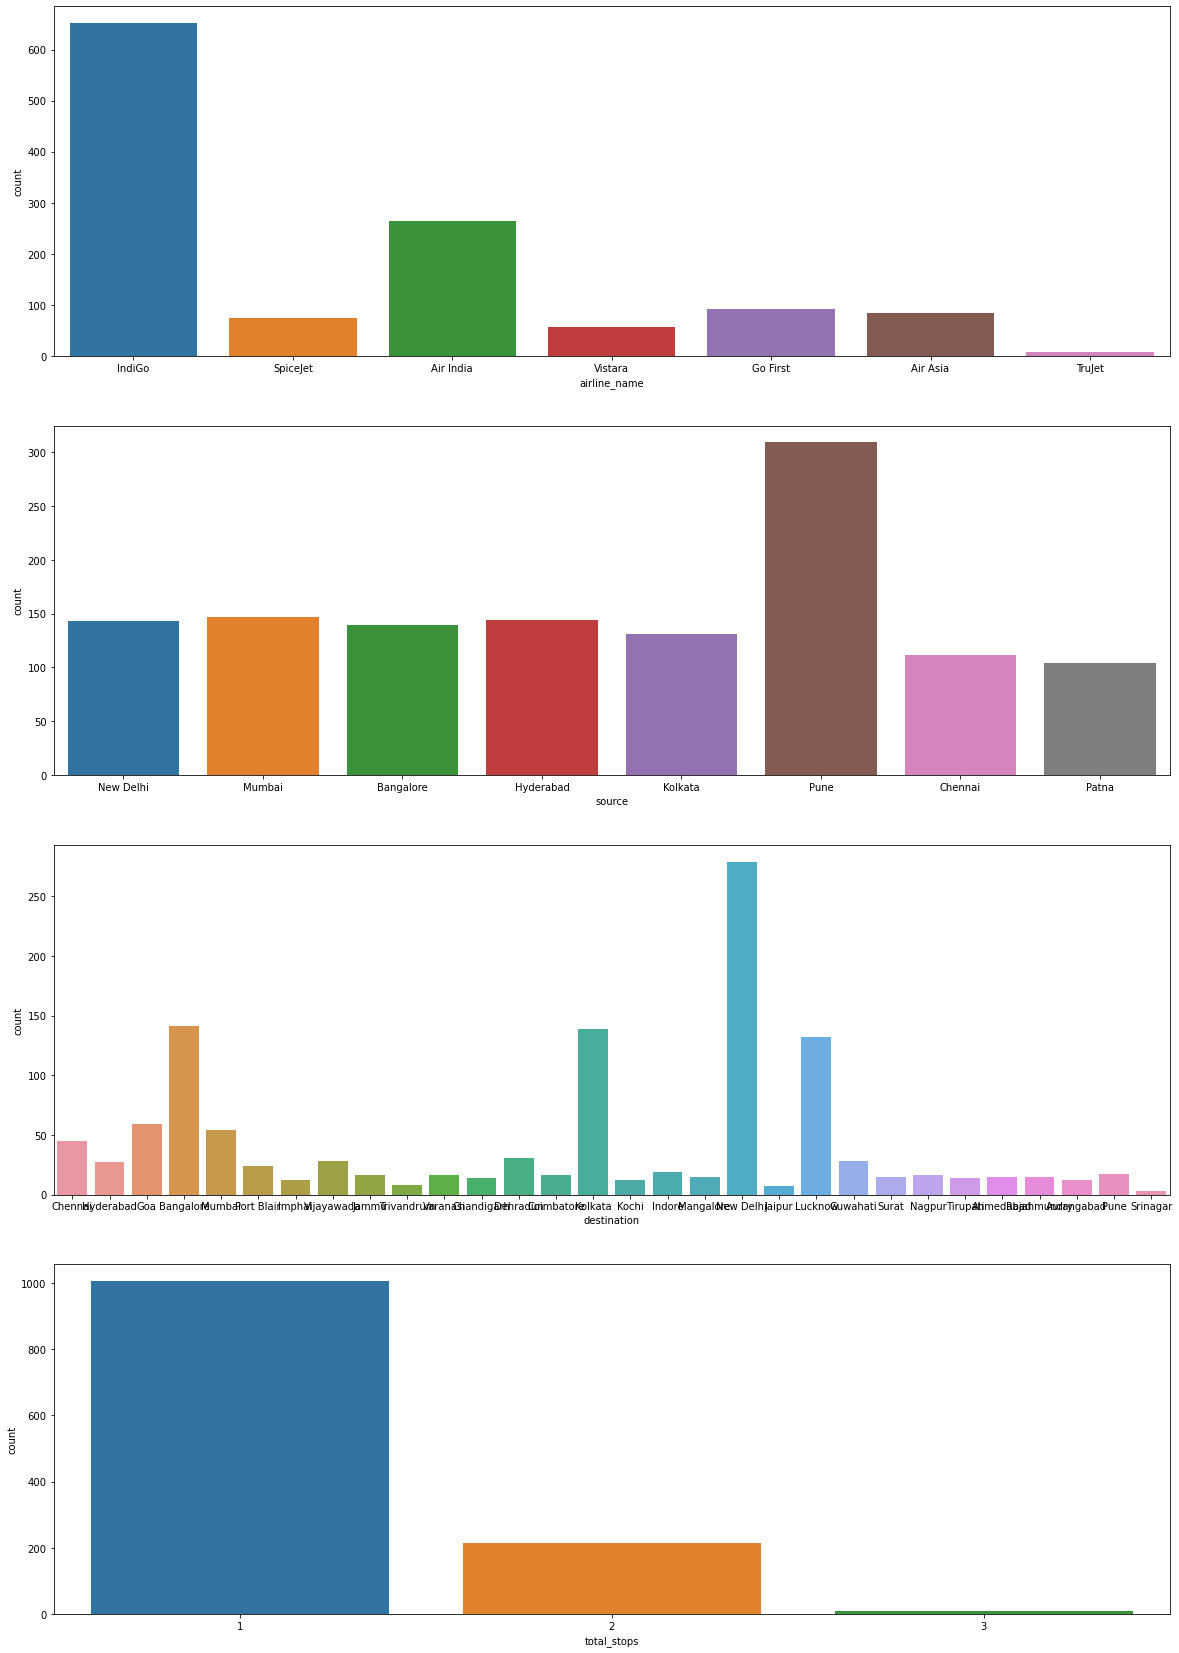

In [232]:
c=1
plt.figure(figsize=(20,45))
for i in category:
    print(i,df[i].unique())
    plt.subplot(6,1,c)
    sns.countplot(df[i])
    c=c+1
plt.show()

In [233]:
numerical = ['month','total_stops','hours','mins','price','arrival_time_hour','arrival_time_min']

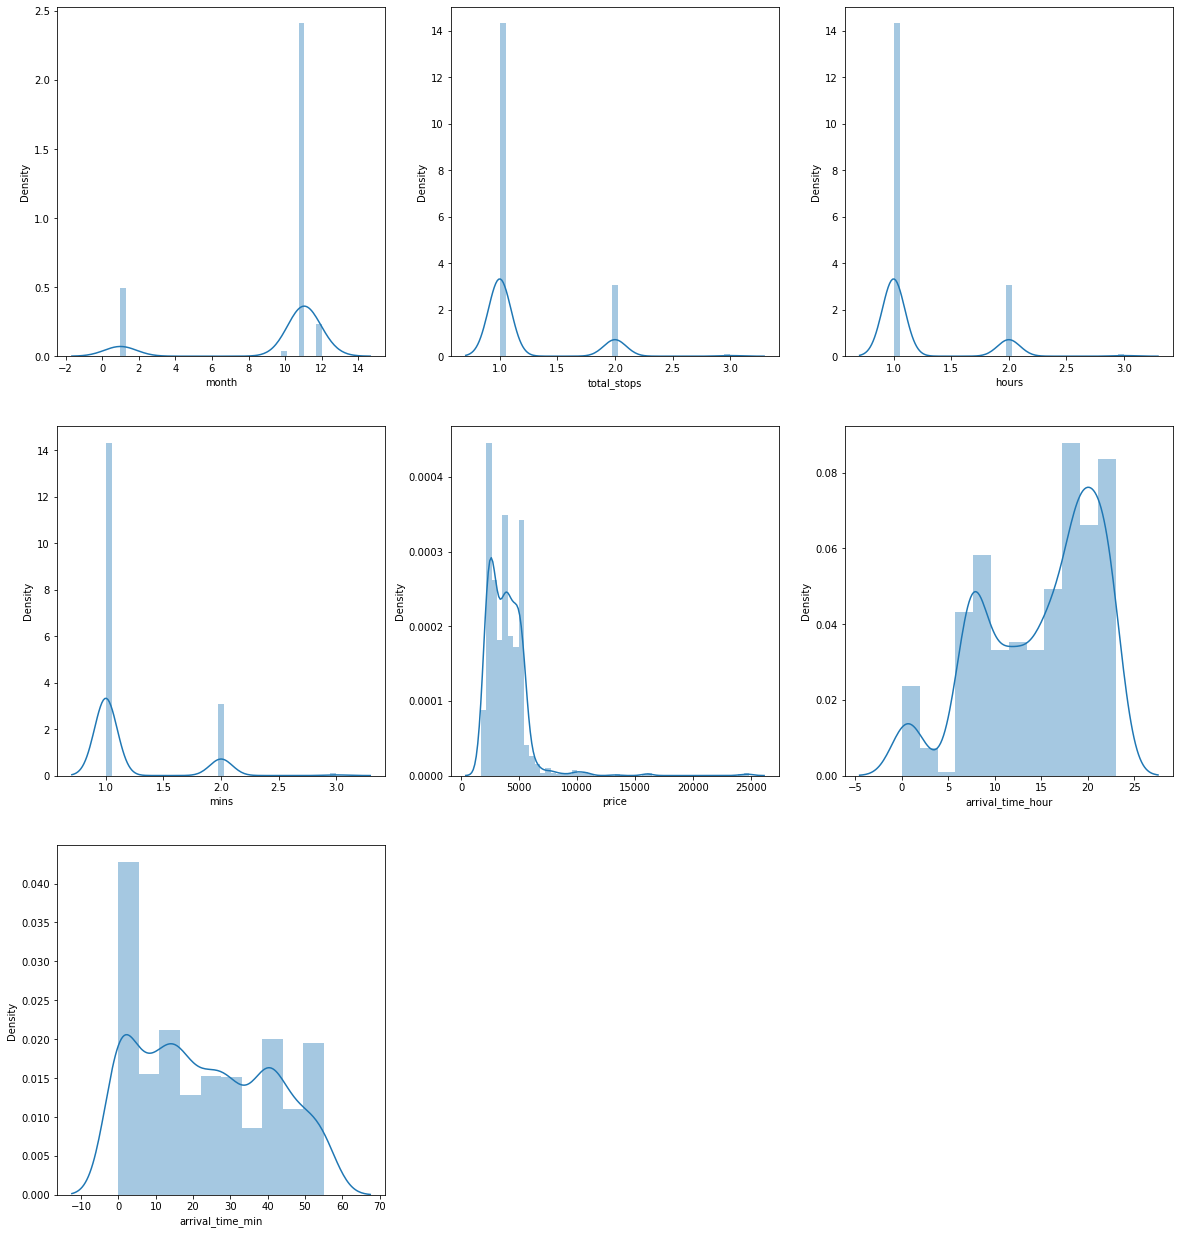

In [234]:
c=1
plt.figure(figsize=(20,45))
for i in numerical:
    plt.subplot(6,3,c)
    sns.distplot(df[i])
    c=c+1
plt.show()

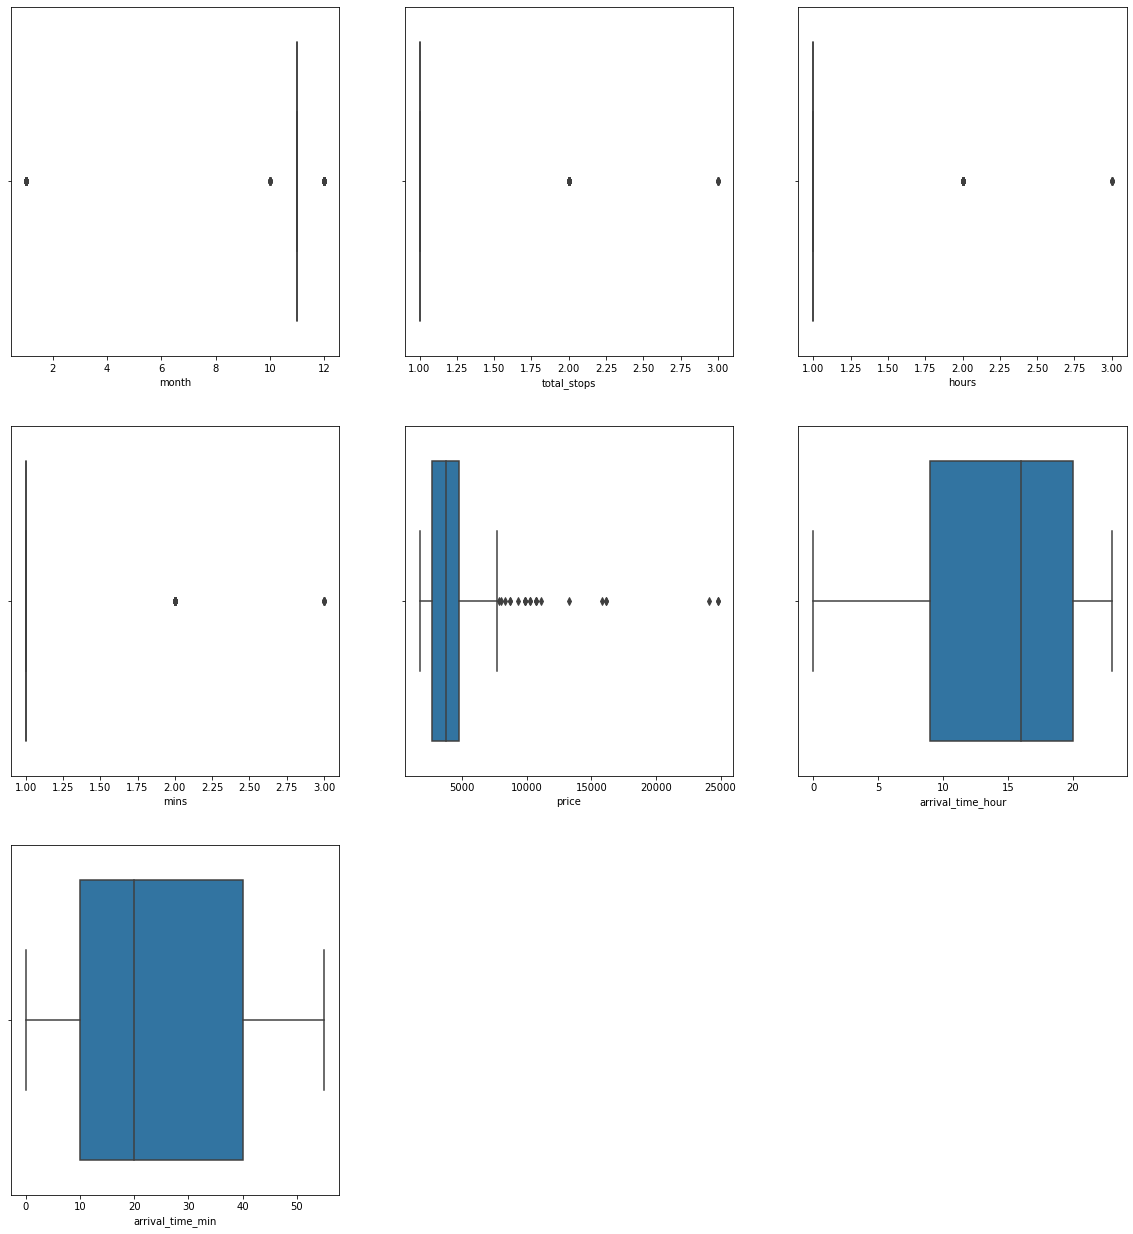

In [235]:
c=1
plt.figure(figsize=(20,45))
for i in numerical:
    plt.subplot(6,3,c)
    sns.boxplot(df[i])
    c=c+1
plt.show()

In [236]:
labelencoder = LabelEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = labelencoder.fit_transform(df[i])

In [237]:
df

,airline_name,date_of_journey,source,destination,departure_time,duration,total_stops,price,month,hours,mins,arrival_time_hour,arrival_time_min
0,3,5,5,4,160,109,2,2341.0,11,2,2,23,20
1,4,5,5,4,140,108,1,2621.0,11,1,1,21,10
2,4,5,5,4,22,110,1,2621.0,11,1,1,9,10
3,1,5,5,4,162,110,1,2658.0,11,1,1,23,35
4,6,5,5,4,96,109,1,2715.0,11,1,1,16,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,1,1,7,16,144,30,1,5255.0,11,1,1,8,15
1666,1,1,7,16,50,79,1,5255.0,11,1,1,8,15
1667,1,1,7,16,144,84,1,5255.0,11,1,1,19,40
1668,2,1,7,16,115,153,1,5358.0,11,1,1,22,15


In [262]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_new=sc.fit_transform(df)
df_new

array([[ 0.37242279, -0.83890929,  0.42196263, ...,  1.9951941 ,
         1.30628487, -0.19812643],
       [ 1.12031103, -0.83890929,  0.42196263, ..., -0.46181347,
         0.98774834, -0.77788211],
       [ 1.12031103, -0.83890929,  0.42196263, ..., -0.46181347,
        -0.92347083, -0.77788211],
       ...,
       [-1.1233537 , -1.21999209,  1.24382011, ..., -0.46181347,
         0.66921181,  0.96138493],
       [-0.37546546, -1.21999209,  1.24382011, ..., -0.46181347,
         1.14701661, -0.48800427],
       [-0.37546546, -1.21999209,  1.24382011, ..., -0.46181347,
        -1.24200736,  0.38162925]])

In [273]:
df_new = df[['month','total_stops','hours','mins','price','arrival_time_hour','arrival_time_min']]

In [274]:
z = np.abs(zscore(df_new))
z.shape

(1229, 7)

In [275]:
threshold=3
print(np.where(z>3))

(array([ 182,  183,  192,  290,  290,  290,  349,  349,  349,  394,  394,
        394,  478,  478,  478,  552,  552,  552,  698,  698,  698,  764,
        765,  766,  767,  768,  785,  786,  787,  788,  793,  794,  795,
        796,  797,  798, 1010, 1010, 1010, 1084, 1084, 1084], dtype=int64), array([4, 4, 4, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 3, 1, 2, 3],
      dtype=int64))


In [276]:
df_new=df_new[(z<3).all(axis=1)]
df_new

,month,total_stops,hours,mins,price,arrival_time_hour,arrival_time_min
0,11,2,2,2,2341.0,23,20
1,11,1,1,1,2621.0,21,10
2,11,1,1,1,2621.0,9,10
3,11,1,1,1,2658.0,23,35
4,11,1,1,1,2715.0,16,20
...,...,...,...,...,...,...,...
1665,11,1,1,1,5255.0,8,15
1666,11,1,1,1,5255.0,8,15
1667,11,1,1,1,5255.0,19,40
1668,11,1,1,1,5358.0,22,15


In [277]:
for i in df.columns:
    if df_new[i].dtypes == 'object':
        df_new[i] = df[i].astype(float)

KeyError: 'airline_name'

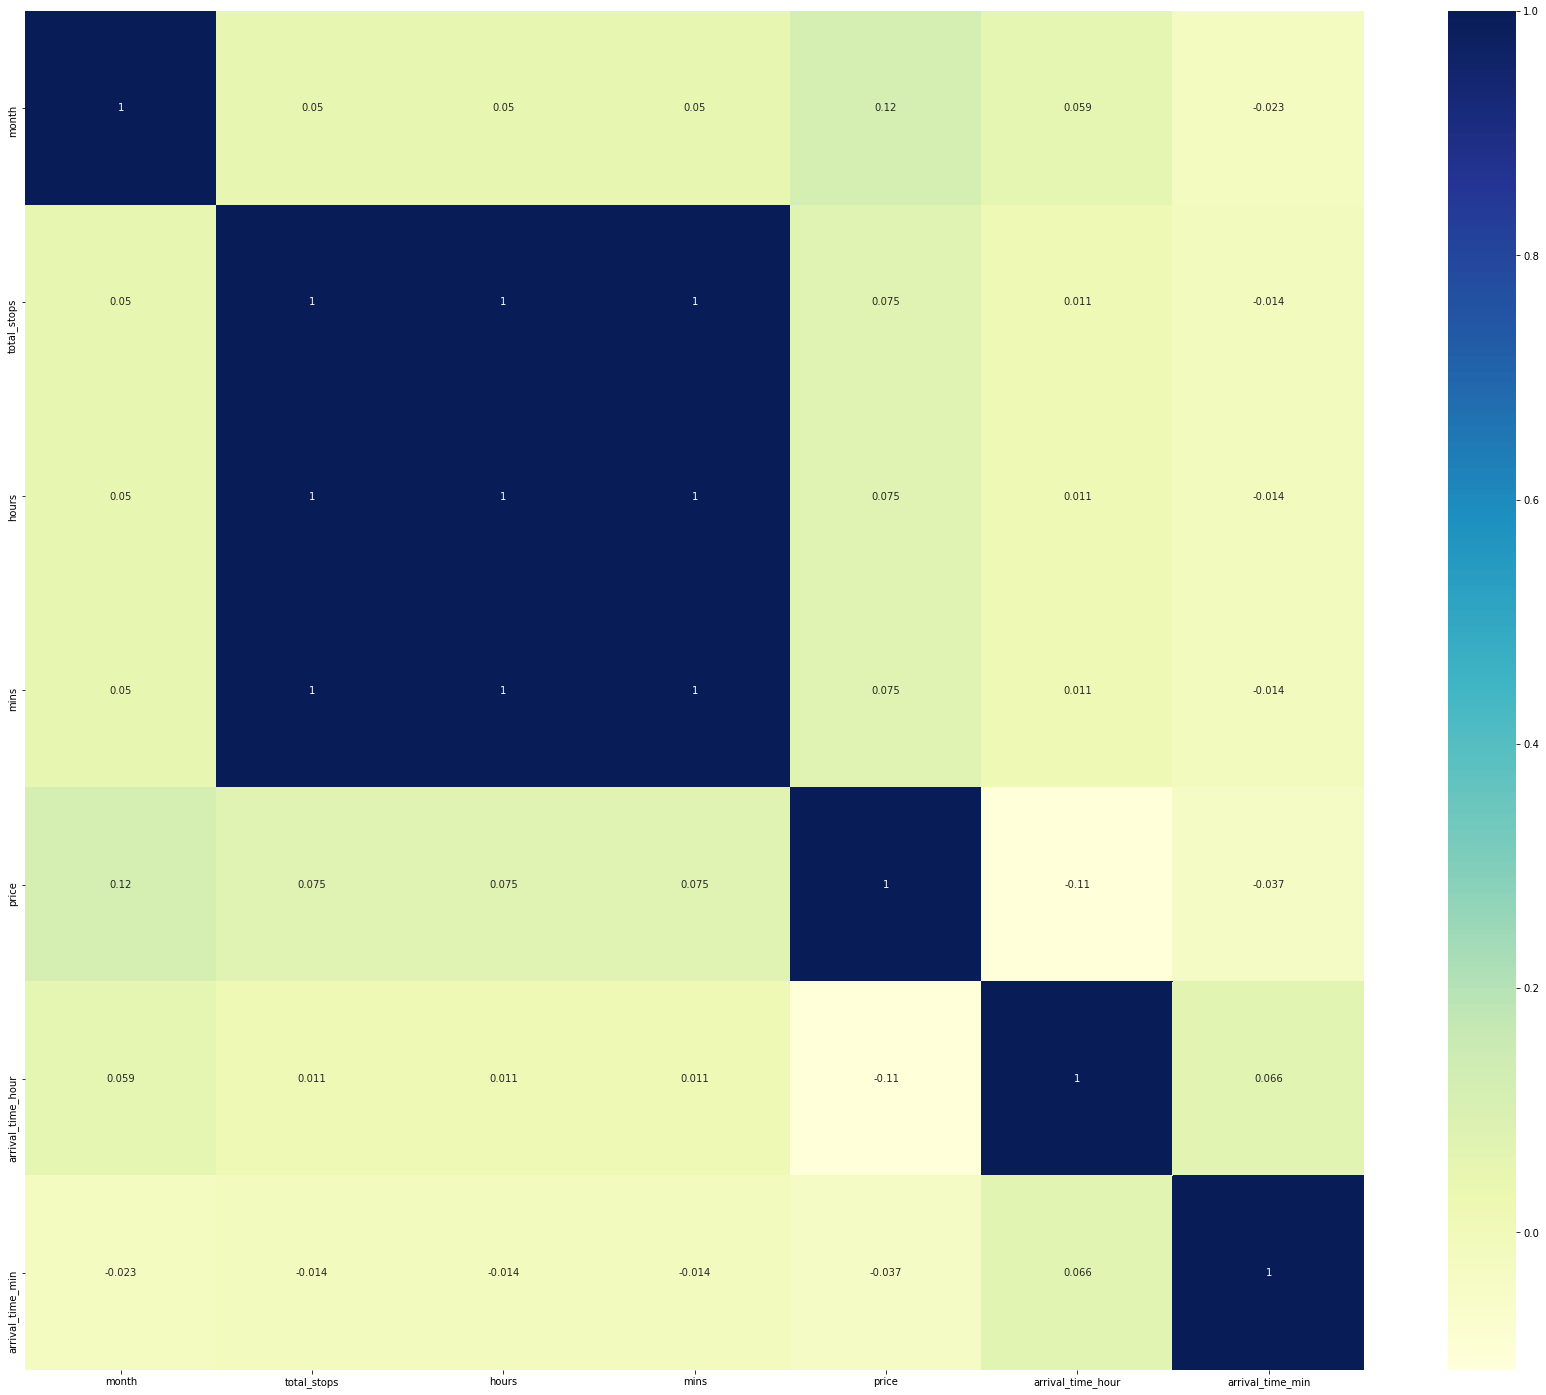

In [278]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_new.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [279]:
#Dividing data into X and y variables
y = df_new.pop('price')
X = df_new

In [298]:
X

,month,total_stops,hours,mins,arrival_time_hour,arrival_time_min
0,11,2,2,2,23,20
1,11,1,1,1,21,10
2,11,1,1,1,9,10
3,11,1,1,1,23,35
4,11,1,1,1,16,20
...,...,...,...,...,...,...
1665,11,1,1,1,8,15
1666,11,1,1,1,8,15
1667,11,1,1,1,19,40
1668,11,1,1,1,22,15


In [280]:
X.skew()

month               -1.837581
total_stops          1.716799
hours                1.716799
mins                 1.716799
arrival_time_hour   -0.611159
arrival_time_min     0.238747
dtype: float64

In [281]:
from sklearn.preprocessing import power_transform

In [306]:
x = power_transform(X)
x = pd.DataFrame(x,columns=X.columns)

In [307]:
x.skew()

month               -1.659173
total_stops          1.716799
hours                1.716799
mins                 1.716799
arrival_time_hour   -0.399396
arrival_time_min    -0.317033
dtype: float64

In [299]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(X)
x

array([[ 0.41267178,  2.17452786,  2.17452786,  2.17452786,  1.29365712,
        -0.18829427],
       [ 0.41267178, -0.45986994, -0.45986994, -0.45986994,  0.97727787,
        -0.76910966],
       [ 0.41267178, -0.45986994, -0.45986994, -0.45986994, -0.92099761,
        -0.76910966],
       ...,
       [ 0.41267178, -0.45986994, -0.45986994, -0.45986994,  0.66089863,
         0.97333652],
       [ 0.41267178, -0.45986994, -0.45986994, -0.45986994,  1.1354675 ,
        -0.47870197],
       [ 0.41267178, -0.45986994, -0.45986994, -0.45986994, -1.23737685,
         0.39252113]])

In [300]:
x = pd.DataFrame(x,columns=X.columns)

In [301]:
from sklearn.metrics import r2_score , mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR

In [302]:
dt = DecisionTreeRegressor()
svr = SVR()
knn = KNeighborsRegressor()
lr = LinearRegression()

In [303]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=42)

In [304]:
for i in [dt,svr,knn,lr]:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    test_score = r2_score(y_test,pred)
    train_score = r2_score(y_train,i.predict(x_train))
    if abs(train_score - test_score) <= 0.1:
        print(i)
        print("R2 score is ",r2_score(y_test,pred))
        print("R2 score of train data is ",r2_score(y_train,i.predict(x_train))) 
        print("Mean absolute error is  ",mean_absolute_error(y_test,pred))
        print("Mean squared error is  ",mean_squared_error(y_test,pred))
        print("Root mean squared error is  ",(mean_squared_error(y_test,pred,squared=False)))                                

SVR()
R2 score is  0.00040269486475696947
R2 score of train data is  0.0025497887446209733
Mean absolute error is   1035.1358784607062
Mean squared error is   1479964.468530331
Root mean squared error is   1216.537902627917
LinearRegression()
R2 score is  0.04970648531045552
R2 score of train data is  0.024652713636235668
Mean absolute error is   1013.2287990656824
Mean squared error is   1406967.2148876488
Root mean squared error is   1186.1564883638453
